In [1]:
import pandas as pd
import networkx as nx

In [2]:
# Reading in datasets/book1.csv
book1 = pd.read_csv('raw/book1.csv')

# Printing out the head of the dataset
print(book1.head())

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  


In [3]:
# Creating an empty graph object
G_book1 = nx.Graph()
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [4]:
# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv('raw/' + book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [5]:
# 计算度中心性
def calculate_and_sort_degree_centrality(graph):
    deg_cen = nx.degree_centrality(graph)
    sorted_deg_cen = sorted(deg_cen.items(), key=lambda x: x[1], reverse=True)[:10]
    return sorted_deg_cen

# 对每本书计算度中心性
sorted_deg_cen_books = [calculate_and_sort_degree_centrality(book) for book in books]

# 转换为 DataFrame
sorted_deg_cen_dfs = {
    f"book{i+1}": pd.DataFrame(sorted_deg_cen_books[i], columns=["Node", "Degree Centrality"])
    for i in range(len(books))
}

In [6]:
df1_1 = sorted_deg_cen_dfs["book1"]
df1_1

,Node,Degree Centrality
0,Eddard-Stark,0.354839
1,Robert-Baratheon,0.268817
2,Tyrion-Lannister,0.247312
3,Catelyn-Stark,0.231183
4,Jon-Snow,0.198925
5,Robb-Stark,0.188172
6,Sansa-Stark,0.188172
7,Bran-Stark,0.172043
8,Cersei-Lannister,0.161290
9,Joffrey-Baratheon,0.161290


In [7]:
df2_1 = sorted_deg_cen_dfs["book2"]
df2_1

,Node,Degree Centrality
0,Tyrion-Lannister,0.205426
1,Joffrey-Baratheon,0.182171
2,Cersei-Lannister,0.166667
3,Arya-Stark,0.155039
4,Stannis-Baratheon,0.143411
5,Robb-Stark,0.135659
6,Catelyn-Stark,0.127907
7,Theon-Greyjoy,0.124031
8,Renly-Baratheon,0.120155
9,Bran-Stark,0.116279


In [8]:
df3_1 = sorted_deg_cen_dfs["book3"]
df3_1

,Node,Degree Centrality
0,Tyrion-Lannister,0.195364
1,Jon-Snow,0.172185
2,Joffrey-Baratheon,0.165563
3,Robb-Stark,0.162252
4,Sansa-Stark,0.158940
5,Jaime-Lannister,0.149007
6,Catelyn-Stark,0.125828
7,Cersei-Lannister,0.125828
8,Arya-Stark,0.122517
9,Stannis-Baratheon,0.102649


In [9]:
df4_1 = sorted_deg_cen_dfs["book4"]
df4_1

,Node,Degree Centrality
0,Jaime-Lannister,0.234432
1,Cersei-Lannister,0.219780
2,Brienne-of-Tarth,0.102564
3,Tyrion-Lannister,0.095238
4,Margaery-Tyrell,0.091575
5,Sansa-Stark,0.087912
6,Tommen-Baratheon,0.087912
7,Samwell-Tarly,0.073260
8,Stannis-Baratheon,0.073260
9,Petyr-Baelish,0.069597


In [10]:
df5_1 = sorted_deg_cen_dfs["book5"]
df5_1

,Node,Degree Centrality
0,Jon-Snow,0.196203
1,Daenerys-Targaryen,0.183544
2,Stannis-Baratheon,0.148734
3,Tyrion-Lannister,0.104430
4,Theon-Greyjoy,0.104430
5,Cersei-Lannister,0.088608
6,Barristan-Selmy,0.079114
7,Hizdahr-zo-Loraq,0.069620
8,Asha-Greyjoy,0.056962
9,Melisandre,0.053797


In [11]:
df_all_1= pd.concat([df1_1.iloc[:, 0], df2_1.iloc[:, 0], df3_1.iloc[:, 0], df4_1.iloc[:, 0], df5_1.iloc[:, 0]])
df_all_1.tail()

5    Cersei-Lannister
6     Barristan-Selmy
7    Hizdahr-zo-Loraq
8        Asha-Greyjoy
9          Melisandre
Name: Node, dtype: object

In [12]:
# find duplicates
duplicates = df_all_1[df_all_1.duplicated(keep=False)].reset_index(drop=True)

# count duplicates
duplicate_counts = duplicates.value_counts()

#print("Duplicates：")
#print(duplicates)

print("\nCount Duplicates：")
print(duplicate_counts)


Count Duplicates：
Node
Tyrion-Lannister     5
Cersei-Lannister     5
Stannis-Baratheon    4
Catelyn-Stark        3
Jon-Snow             3
Robb-Stark           3
Sansa-Stark          3
Joffrey-Baratheon    3
Bran-Stark           2
Arya-Stark           2
Theon-Greyjoy        2
Jaime-Lannister      2
Name: count, dtype: int64


对齐社区

In [13]:
# 将社区结果合并到角色列表中
community_results = pd.read_csv("results/community_results.csv")  # 确保路径正确
top_characters = df_all_1.value_counts().index.tolist()[:10]  # 前 10 角色

# 筛选出重要角色的社区数据
important_community = community_results[community_results['Node'].isin(top_characters)]

# 对齐社区编号
community_mapping = {
    (1, 0): (2, 6), (1, 1): (2, 0), (1, 3): (2, 3), (1, 5): (2, 1), (1, 6): (2, 1), (1, 7): (2, 4),
    (2, 0): (3, 7), (2, 1): (3, 0), (2, 2): (3, 1), (2, 3): (3, 6), (2, 4): (3, 2), (2, 6): (3, 3),
    (3, 0): (4, 3), (3, 1): (4, 0), (3, 2): (4, 1), (3, 3): (4, 0), (3, 4): (4, 0), (3, 5): (4, 3),
    (4, 0): (5, 6), (4, 1): (5, 4), (4, 2): (5, 6), (4, 7): (5, 1), (4, 8): (5, 2), (4, 9): (5, 6),
    (4, 10): (5, 5)
}
# 检查未映射的 (Book, Community)
unmapped_values = important_community[~important_community.apply(
    lambda row: (row['Book'], row['Community']) in community_mapping, axis=1
)]
print("Unmapped Values:\n", unmapped_values[['Book', 'Community']].drop_duplicates())




Unmapped Values:
       Book  Community
40       1          2
209      2          5
448      3          8
478      3          6
831      4          3
865      4          4
1035     5          1
1043     5          3
1089     5          5
1169     5          2
1174     5          9


In [14]:
# 确保是操作原始 DataFrame 的副本，而非切片副本
important_community = important_community.copy()

# 使用 .loc 明确定位和赋值
important_community.loc[:, 'Aligned_Community'] = important_community.apply(
    lambda row: community_mapping.get((row['Book'], row['Community']), (row['Book'], -1))[1],
    axis=1
)


In [15]:
# 确保索引唯一
important_community = important_community.reset_index(drop=True)



In [16]:
# 修复 SettingWithCopyWarning 并处理未映射值
important_community.loc[:, 'Aligned_Community'] = important_community.apply(
    lambda row: community_mapping.get((row['Book'], row['Community']), (row['Book'], -1))[1],
    axis=1
)


In [17]:
# 计算社区变化
community_changes = important_community.groupby('Node')['Aligned_Community'].apply(lambda x: x != x.shift())


In [18]:
# 将结果赋值到原始 DataFrame
important_community['Community_Change'] = community_changes.reset_index(drop=True)

In [19]:
# 导出数据到 CSV 文件
important_community.to_csv('results/important_community_changes.csv', index=False)
print("结果已导出到 important_community_changes.csv 文件中")

结果已导出到 important_community_changes.csv 文件中


统计角色社区变化次数

In [20]:
important_community_changes = pd.read_csv('results/important_community_changes.csv')
# 统计社区变化次数
community_change_counts = important_community_changes.groupby('Node')['Community_Change'].sum().reset_index()
community_change_counts.columns = ['Node', 'Total_Changes']

# 显示统计结果
print(community_change_counts)

                Node  Total_Changes
0         Arya-Stark              5
1      Catelyn-Stark              4
2   Cersei-Lannister              5
3    Jaime-Lannister              5
4  Joffrey-Baratheon              5
5           Jon-Snow              4
6         Robb-Stark              4
7        Sansa-Stark              5
8  Stannis-Baratheon              4
9   Tyrion-Lannister              4


计算角色对社区结构的影响

In [21]:
from networkx.algorithms.community import modularity
from networkx.algorithms.community import greedy_modularity_communities

In [22]:
# 定义模块度计算函数
def calculate_modularity(graph, removed_node=None):
    if removed_node:
        graph.remove_node(removed_node)
    communities = list(greedy_modularity_communities(graph))
    return modularity(graph, communities)

# 确保 'Node' 和 'Aligned_Community' 数据类型为字符串
important_community_changes['Node'] = important_community_changes['Node'].astype(str)
important_community_changes['Aligned_Community'] = important_community_changes['Aligned_Community'].astype(str)


# 初始化结果列表
impact_results = []


In [23]:
# 遍历每本书
for book in range(1, 6):
    book_data = important_community_changes[important_community_changes['Book'] == book]
    graph = nx.Graph()
    for _, row in book_data.iterrows(): 
        graph.add_edge(row['Node'], row['Aligned_Community'])
    
    for node in book_data['Node'].unique():
        mod_before = calculate_modularity(graph.copy())
        mod_after = calculate_modularity(graph.copy(), removed_node=node)
        impact_results.append({
            'Book': book,
            'Node': node,
            'Modularity_Before': mod_before,
            'Modularity_After': mod_after,
            'Impact': mod_before - mod_after
        })

# 转为 DataFrame
impact_df = pd.DataFrame(impact_results)


In [24]:
print(impact_df)

    Book               Node  Modularity_Before  Modularity_After    Impact
0      1    Jaime-Lannister               0.70          0.691358  0.008642
1      1           Jon-Snow               0.70          0.641975  0.058025
2      1   Tyrion-Lannister               0.70          0.691358  0.008642
3      1         Arya-Stark               0.70          0.716049 -0.016049
4      1      Catelyn-Stark               0.70          0.691358  0.008642
5      1   Cersei-Lannister               0.70          0.666667  0.033333
6      1  Joffrey-Baratheon               0.70          0.716049 -0.016049
7      1         Robb-Stark               0.70          0.716049 -0.016049
8      1        Sansa-Stark               0.70          0.716049 -0.016049
9      1  Stannis-Baratheon               0.70          0.666667  0.033333
10     2   Tyrion-Lannister               0.66          0.666667 -0.006667
11     2           Jon-Snow               0.66          0.592593  0.067407
12     2         Arya-Sta

可视化角色的社区变化趋势

In [25]:
import matplotlib.pyplot as plt

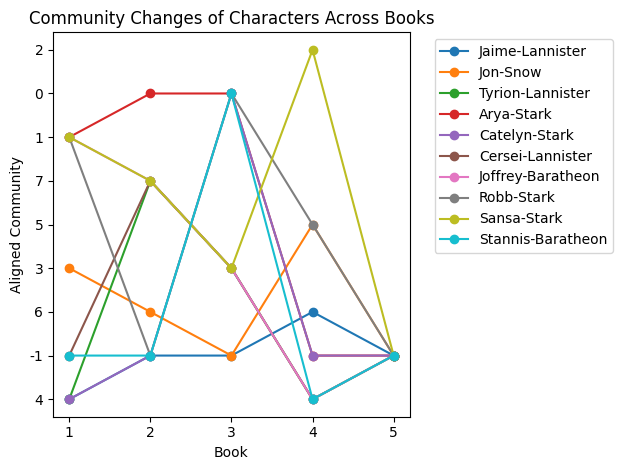

In [26]:
for node in important_community_changes['Node'].unique():
    data = important_community_changes[important_community_changes['Node'] == node]
    plt.plot(data['Book'], data['Aligned_Community'], marker='o', label=node)

plt.title("Community Changes of Characters Across Books")
plt.xlabel("Book")
plt.ylabel("Aligned Community")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

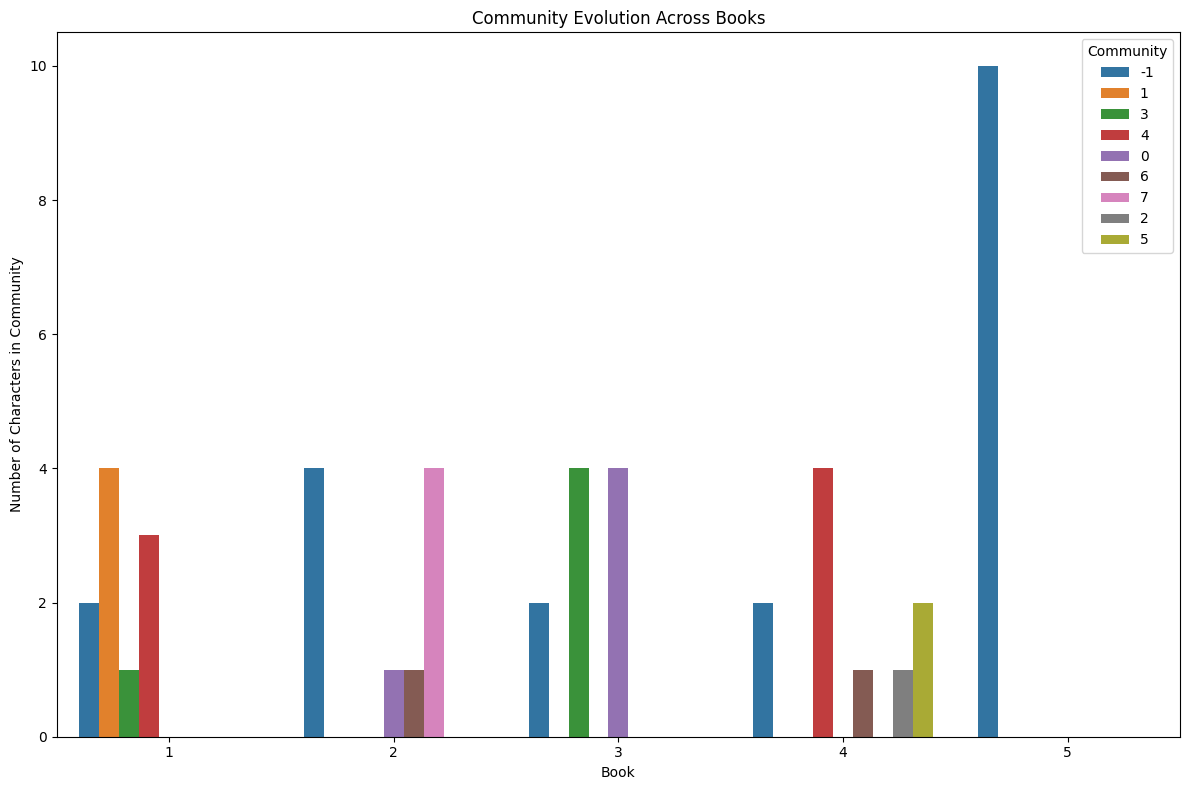

In [27]:
# 统计每本书中每个社区的角色数量
community_evolution = important_community_changes.groupby(['Book', 'Aligned_Community'])['Node'].count().reset_index()
community_evolution.columns = ['Book', 'Community', 'Character_Count']

# 可视化社区演化
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=community_evolution, x='Book', y='Character_Count', hue='Community')
plt.title('Community Evolution Across Books')
plt.xlabel('Book')
plt.ylabel('Number of Characters in Community')
plt.legend(title='Community')
plt.tight_layout()
plt.show()


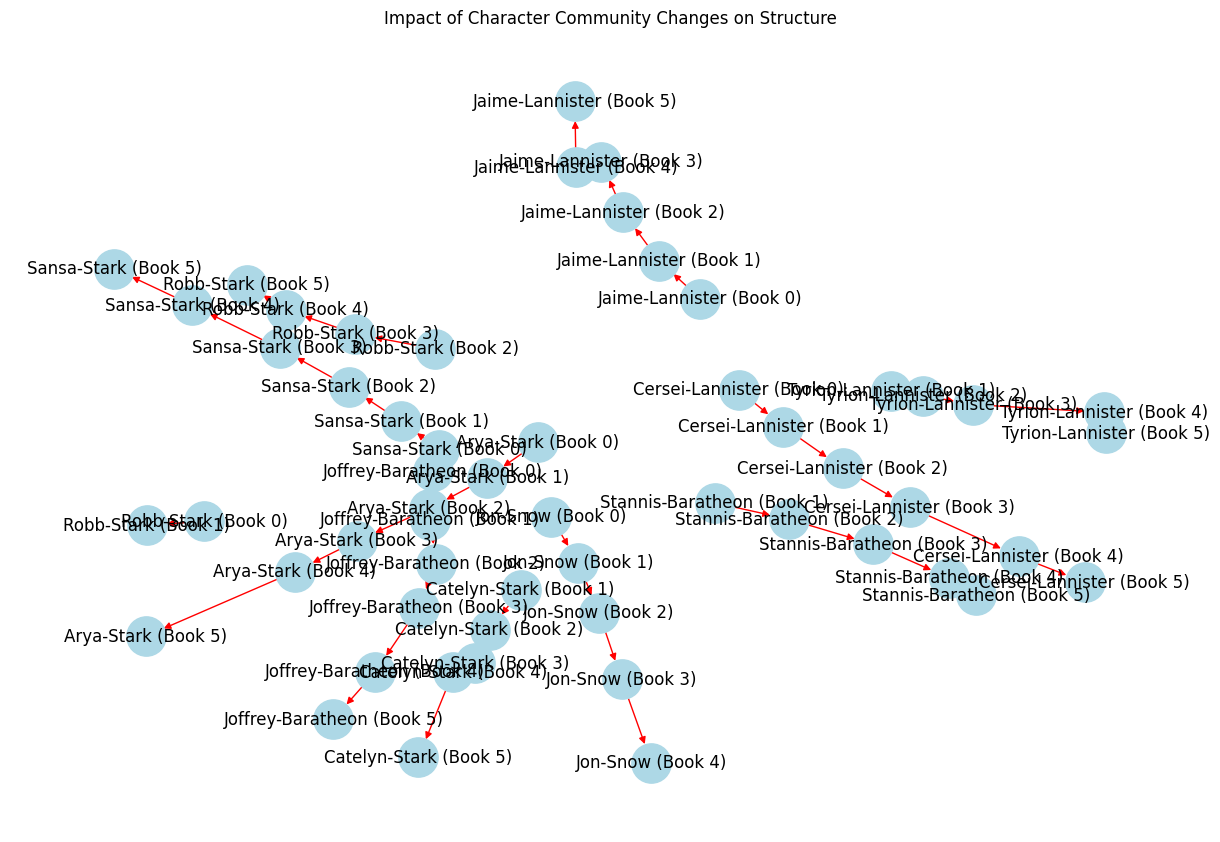

In [28]:
import matplotlib.pyplot as plt
import networkx as nx

# 创建全局图对象
G = nx.DiGraph()  # 使用有向图表示角色移动

# 遍历每本书的角色变化
for book in range(1, 6):
    book_data = important_community_changes[important_community_changes['Book'] == book]

    for _, row in book_data.iterrows():
        # 如果社区变化，则添加角色从前一个社区到当前社区的边
        if row['Community_Change']:
            G.add_edge(
                f"{row['Node']} (Book {book - 1})",
                f"{row['Node']} (Book {book})",
                community_change=True,
                community=row['Aligned_Community']
            )

# 分配节点颜色
colors = {
    True: "red",  # 社区变化用红色
    False: "blue"  # 无变化用蓝色
}
edge_colors = [
    colors[G[u][v]['community_change']] for u, v in G.edges()
]

# 绘制网络图
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, weight='community_change', seed=42)
 # 使用 spring 布局
nx.draw(
    G, pos, with_labels=True, node_color="lightblue", edge_color=edge_colors, node_size=800
)
plt.title("Impact of Character Community Changes on Structure")
plt.show()


In [29]:
print("Nodes in G:", G.nodes(data=True))

Nodes in G: [('Jaime-Lannister (Book 0)', {}), ('Jaime-Lannister (Book 1)', {}), ('Jon-Snow (Book 0)', {}), ('Jon-Snow (Book 1)', {}), ('Arya-Stark (Book 0)', {}), ('Arya-Stark (Book 1)', {}), ('Cersei-Lannister (Book 0)', {}), ('Cersei-Lannister (Book 1)', {}), ('Joffrey-Baratheon (Book 0)', {}), ('Joffrey-Baratheon (Book 1)', {}), ('Robb-Stark (Book 0)', {}), ('Robb-Stark (Book 1)', {}), ('Sansa-Stark (Book 0)', {}), ('Sansa-Stark (Book 1)', {}), ('Tyrion-Lannister (Book 1)', {}), ('Tyrion-Lannister (Book 2)', {}), ('Jon-Snow (Book 2)', {}), ('Arya-Stark (Book 2)', {}), ('Jaime-Lannister (Book 2)', {}), ('Stannis-Baratheon (Book 1)', {}), ('Stannis-Baratheon (Book 2)', {}), ('Joffrey-Baratheon (Book 2)', {}), ('Cersei-Lannister (Book 2)', {}), ('Sansa-Stark (Book 2)', {}), ('Catelyn-Stark (Book 1)', {}), ('Catelyn-Stark (Book 2)', {}), ('Jaime-Lannister (Book 3)', {}), ('Joffrey-Baratheon (Book 3)', {}), ('Tyrion-Lannister (Book 3)', {}), ('Catelyn-Stark (Book 3)', {}), ('Robb-Stark 

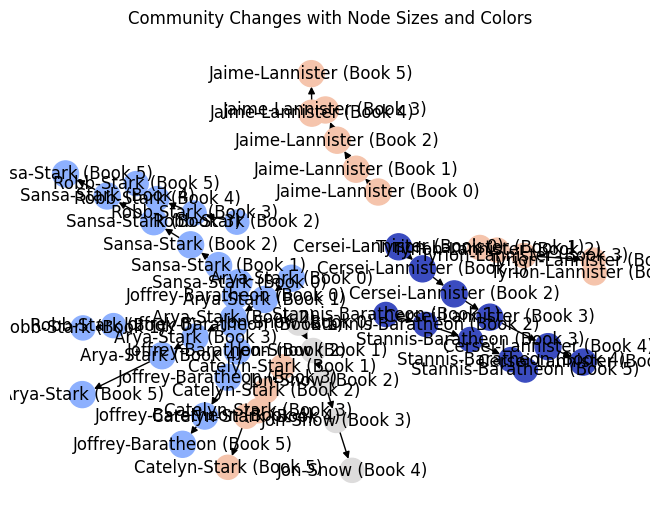

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import networkx as nx
import matplotlib.pyplot as plt


# 确保社区编号是数值类型
important_community_changes['Aligned_Community'] = important_community_changes['Aligned_Community'].astype(float)

# 获取社区编号的唯一值并定义色图
unique_communities = important_community_changes['Aligned_Community'].unique()
cmap = plt.colormaps['coolwarm']  # 使用新的 colormaps 方法
norm = mcolors.Normalize(vmin=min(unique_communities), vmax=max(unique_communities))

# 分配节点颜色
node_colors = []
for node in G.nodes():
    # 确认节点对应的社区编号，并映射颜色
    matching_rows = important_community_changes[important_community_changes['Node'] == node.split(" ")[0]]
    if not matching_rows.empty:
        community = matching_rows.iloc[0]['Aligned_Community']
        node_colors.append(cmap(norm(community)))
    else:
        node_colors.append("gray")  # 默认颜色

# 计算节点大小
node_sizes = [
    100 + 50 * important_community_changes[important_community_changes['Node'] == node.split(" ")[0]]['Community_Change'].sum()
    if any(important_community_changes['Node'] == node.split(" ")[0]) else 100
    for node in G.nodes()
]

# 绘制网络图
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    node_size=node_sizes, edge_color="black"
)
plt.title("Community Changes with Node Sizes and Colors")
plt.show()


In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors
import numpy as np
from adjustText import adjust_text  # 用于自动调整文本位置
# 自定义布局函数，将社区划分在不同区域
def community_layout(G, communities, scale=5):
    """
    自定义布局函数，将社区划分在不同区域
    参数:
    G - 图对象
    communities - 每个节点所属的社区编号
    scale - 社区之间的间隔
    
    返回:
    pos - 每个节点的布局位置
    """
    pos = {}
    centers = np.linspace(-scale, scale, len(set(communities)))
    for idx, community in enumerate(set(communities)):
        community_nodes = [node for node, com in zip(G.nodes(), communities) if com == community]
        # 将社区内部节点分布为一个圆形
        circular_pos = nx.circular_layout(G.subgraph(community_nodes), scale=1.0)
        offset = np.array([centers[idx], 0])  # 社区中心点
        pos.update({node: pos + offset for node, pos in circular_pos.items()})
    return pos

# 创建图对象
G = nx.DiGraph()

# 从数据中动态添加节点和边
for _, row in important_community_changes.iterrows():
    node = f"{row['Node']} (Book {row['Book']})"
    community = row['Aligned_Community']
    G.add_node(node, community=community)  # 添加节点和社区信息
    
    # 如果社区发生变化，则添加边
    if row['Community_Change']:
        prev_node = f"{row['Node']} (Book {row['Book'] - 1})"
        if prev_node in G.nodes:
            G.add_edge(prev_node, node)

# 提取社区编号
communities = [G.nodes[node]['community'] for node in G.nodes]

# 为节点分配颜色
unique_communities = set(communities)
cmap = plt.colormaps["coolwarm"]
norm = mcolors.Normalize(vmin=min(unique_communities), vmax=max(unique_communities))
node_colors = [cmap(norm(G.nodes[node]['community'])) for node in G.nodes]

# 定义跨社区和社区内边颜色
edge_colors = [
    "red" if G.nodes[u]['community'] != G.nodes[v]['community'] else "black"
    for u, v in G.edges
]

# 调用自定义布局
pos = community_layout(G, communities)

# 绘制网络图
plt.figure(figsize=(12, 10))
nx.draw(
    G, pos, with_labels=False, node_color=node_colors,
    edge_color=edge_colors, node_size=800, arrows=True
)

# 调整标签文本格式，允许换行
texts = []
for node, (x, y) in pos.items():
    label = node.replace(" (", "\n(")  # 将括号前的内容与括号内容分两行
    texts.append(plt.text(x, y, label, fontsize=10, ha='center', va='center'))

# 自动调整文本标签，避免重叠
from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

# 添加标题并显示
plt.title("Community Layout with Adjusted Labels and Line Breaks")
plt.show()


ModuleNotFoundError: No module named 'adjustText'

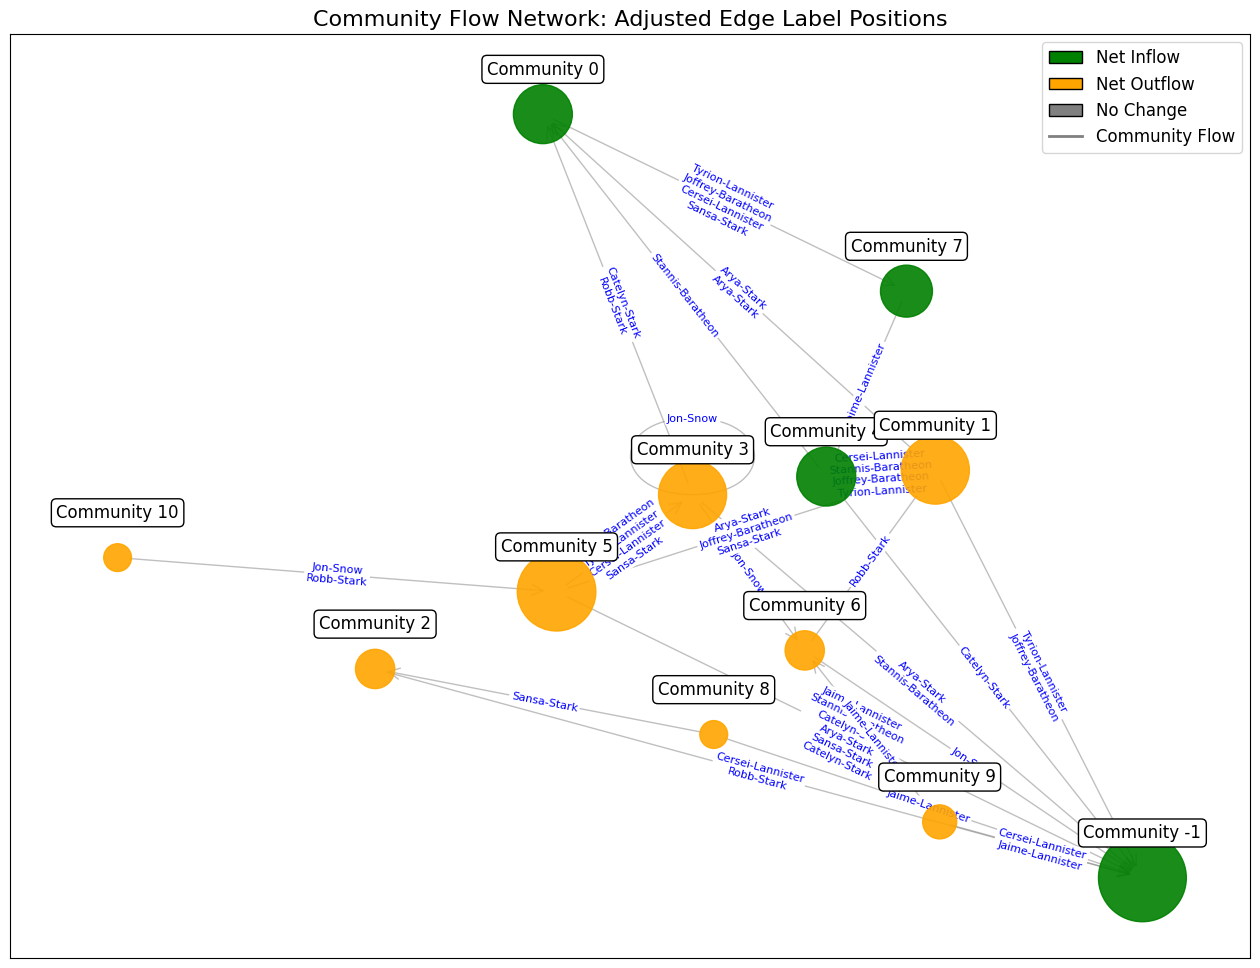

In [42]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Step 1: 数据准备和图构建
community_changes = important_community_changes.copy()

# 确保社区标签格式一致
community_changes['Community'] = community_changes['Community'].apply(lambda x: f'Community {int(x)}')
community_changes['Aligned_Community'] = community_changes['Aligned_Community'].apply(lambda x: f'Community {int(x)}')

community_changes['Source'] = community_changes['Community']
community_changes['Target'] = community_changes['Aligned_Community']

# 创建有向图 G_flow
G_flow = nx.DiGraph()
for _, row in community_changes.iterrows():
    if row['Community_Change']:
        source = row['Source']
        target = row['Target']
        role = row['Node']
        if (source, target) not in G_flow.edges:
            G_flow.add_edge(source, target, roles=[])
        G_flow.edges[source, target]['roles'].append(role)

# Step 2: 计算节点大小和颜色
inflows = community_changes.groupby('Target')['Node'].count().rename('Inflow')
outflows = community_changes.groupby('Source')['Node'].count().rename('Outflow')
summary = pd.concat([inflows, outflows], axis=1).fillna(0)
summary['Net Change'] = summary['Inflow'] - summary['Outflow']
summary['Community Size'] = summary['Inflow'] + summary['Outflow']

# 定义节点大小和颜色
node_sizes = [summary.loc[summary.index == node, 'Community Size'].values[0] * 200 if node in summary.index else 200
              for node in G_flow.nodes]
node_colors = ['green' if summary.loc[summary.index == node, 'Net Change'].values[0] > 0 else 'orange'
               if node in summary.index else 'gray' for node in G_flow.nodes]

# Step 3: 图的布局
pos_hierarchy = nx.spring_layout(G_flow, seed=42)

# Step 4: 调整边标签位置以减少重叠
def format_edge_label(label, max_per_line=3):
    roles = label.split(', ')
    grouped_roles = ['\n'.join(roles[i:i + max_per_line]) for i in range(0, len(roles), max_per_line)]
    return '\n'.join(grouped_roles)

formatted_edge_labels = {edge: format_edge_label(', '.join(G_flow.edges[edge]['roles']), max_per_line=3) for edge in G_flow.edges}

# Step 5: 绘制网络图
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G_flow, pos_hierarchy, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G_flow, pos_hierarchy, arrowstyle='->', arrowsize=20, edge_color='gray', alpha=0.5)

# 调整节点标签位置
node_labels = {node: node for node in G_flow.nodes}
label_pos = {node: (pos[0], pos[1] + 0.1) for node, pos in pos_hierarchy.items()}
nx.draw_networkx_labels(G_flow, label_pos, labels=node_labels, font_size=12, font_color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# 使用 nx.draw_networkx_edge_labels 绘制边标签
edge_labels = {edge: formatted_edge_labels[edge] for edge in G_flow.edges}
nx.draw_networkx_edge_labels(G_flow, pos_hierarchy, edge_labels=edge_labels, font_size=8, font_color='blue', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

# 添加图例
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Net Inflow'),
    Patch(facecolor='orange', edgecolor='black', label='Net Outflow'),
    Patch(facecolor='gray', edgecolor='black', label='No Change'),
    Line2D([0], [0], color='gray', lw=2, label='Community Flow')
]

plt.legend(handles=legend_elements, loc='best', fontsize=12)

# 添加标题并显示图
plt.title('Community Flow Network: Adjusted Edge Label Positions', fontsize=16)
plt.show()


In [43]:
import networkx as nx
from networkx.algorithms.community import modularity, greedy_modularity_communities

# 定义关键角色
key_characters = ['Tyrion-Lannister', 'Cersei-Lannister', 'Jon-Snow']

# 计算网络结构的初始状态
def calculate_modularity(graph):
    communities = list(greedy_modularity_communities(graph))
    return modularity(graph, communities)

initial_modularity = calculate_modularity(G_book1)
print(f"Initial Modularity: {initial_modularity}")

# 移除关键角色并重新计算模块度
for character in key_characters:
    G_temp = G_book1.copy()
    if G_temp.has_node(character):
        G_temp.remove_node(character)
        new_modularity = calculate_modularity(G_temp)
        print(f"Modularity after removing {character}: {new_modularity}")

# 添加关键角色并重新计算模块度
# 假设我们有一个包含所有角色的完整图 G_full
G_full = nx.Graph()
for _, edge in book1.iterrows():
    G_full.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

for character in key_characters:
    G_temp = G_full.copy()
    if not G_temp.has_node(character):
        G_temp.add_node(character)
        # 假设我们有角色的连接信息，可以从原始数据中获取
        connections = book1[(book1['Source'] == character) | (book1['Target'] == character)]
        for _, edge in connections.iterrows():
            G_temp.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
        new_modularity = calculate_modularity(G_temp)
        print(f"Modularity after adding {character}: {new_modularity}")

Initial Modularity: 0.43517968129872053
Modularity after removing Tyrion-Lannister: 0.446074547159832
Modularity after removing Cersei-Lannister: 0.4987943067973756
Modularity after removing Jon-Snow: 0.42045538272247146
